---
# <center>Political Analysis and Predictions Concerning Tamil Nadu Legislative Assembly election, 2021</center>
---

## 1. Importing necesssary modules

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

---
## 2. Loading Dataset

In [3]:
DataFrame = pd.read_csv('Worksheet.csv')


---
## 3. Exploratory Data Analysis


In [4]:
#Check the shape
print(DataFrame.shape)

(402, 25)


In [5]:
DataFrame.keys()

Index(['Sno', 'Which of the following best describes your age?',
       'What gender do you most identify with?',
       'Are you a registered to vote?',
       'Are you registered to vote at the current address you reside at?',
       'Do you feel that you fully understand the election process?',
       'In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors',
       'Did you voted in the  2021 elections?', 'If not voted, why ?',
       'On what basis do you assess a political candidate?',
       'Which of the following best describes your decision to vote in the 2021 election?',
       'On what basis you select your political candidate.',
       'Contributed or collected money', 'Attended election meetings/rallies',
       'Participated in door to door canvassing',
       'Distributed election leaflets or put up posters',
       'Do you think the existing government is going in the right direction to benefit Tamil Nadu's people?',
       'H

In [6]:
DataFrame.head(5).T

,0,1,2,3,4
Sno,1,2,3,4,5
Which of the following best describes your age?,25 - 40,18 - 24,18 - 24,25 - 40,18 - 24
What gender do you most identify with?,Female,Male,Male,Male,Female
Are you a registered to vote?,Yes,Yes,Yes,Yes,No
Are you registered to vote at the current address you reside at?,No,Yes,No,Yes,No
Do you feel that you fully understand the election process?,A moderate amount,A lot,A lot,A lot,A moderate amount
In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors,Yes,Yes,Yes,No,No
Did you voted in the 2021 elections?,Yes,Yes,Yes,Yes,No
"If not voted, why ?",NaN,NaN,NaN,NaN,"I'm Eligible to vote, but not having Voter ID"
On what basis do you assess a political candidate?,Articles in the newspaper,News on TV,News on TV,I research all the channels before making my c...,I research all the channels before making my c...


In [7]:
column_dict={"Which of the following best describes your age?":"Col1",
          "What gender do you most identify with?":"Col2",
          "Are you a registered to vote?":"Col3",
          "Are you registered to vote at the current address you reside at?":"Col4",
          "Do you feel that you fully understand the election process?":"Col5",
          "In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors":"Col6",
          "Did you voted in the  2021 elections?":"Col7",
          "If not voted, why ?":"Col8",
          "On what basis do you assess a political candidate?":"Col9",
          "Which of the following best describes your decision to vote in the 2021 election?":"Col10",
          "On what basis you select your political candidate.":"Col11",
          "Contributed or collected money":"Col12",
          "Attended election meetings/rallies":"Col13",
          "Participated in door to door canvassing":"Col14",
          "Distributed election leaflets or put up posters":"Col15",
          "Do you think the existing government is going in the right direction to benefit Tamil Nadu's people?":"Col16",
          "How would you rate Edappadi Palanisamy’s performance as the Chief Minister of Tamil Nadu ":"Col17",
          "What is your assessment of the performance of the AIADMK government in Tamil Nadu in the last five years? Would you say that you have been satisfied or dissatisfied with it? ":"Col18",
          "During the last two- three years have you or any of your family members benefited from any Government scheme ? ":"Col19",
          "On the day of voting will you vote for the same party which you voted now or your decision may change? ":"Col20",
          "Which party do you support in your ward?":"Col21",
          "What is your opinion about the candidate? ":"Col22",
          "Which party will rule Tamil Nadu for the next five years?":"Col23",
          "Why do you think your candidate will win?":"Col24"}

DataFrame.rename(columns=column_dict, inplace=True)

#Check the column names again
DataFrame.columns

Index(['Sno', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8',
       'Col9', 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col16',
       'Col17', 'Col18', 'Col19', 'Col20', 'Col21', 'Col22', 'Col23', 'Col24'],
      dtype='object')

### 3.1 Rename the columns to have meaningful names

In [8]:
DataFrame.head(5).T

,0,1,2,3,4
Sno,1,2,3,4,5
Col1,25 - 40,18 - 24,18 - 24,25 - 40,18 - 24
Col2,Female,Male,Male,Male,Female
Col3,Yes,Yes,Yes,Yes,No
Col4,No,Yes,No,Yes,No
Col5,A moderate amount,A lot,A lot,A lot,A moderate amount
Col6,Yes,Yes,Yes,No,No
Col7,Yes,Yes,Yes,Yes,No
Col8,NaN,NaN,NaN,NaN,"I'm Eligible to vote, but not having Voter ID"
Col9,Articles in the newspaper,News on TV,News on TV,I research all the channels before making my c...,I research all the channels before making my c...


In [9]:
DataFrame.set_index("Sno")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
Sno,,,,,,,,,,,,,,,,,,,,,
1,25 - 40,Female,Yes,No,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,"I am going to vote, and I know which candidate...",...,No,Yes,Neutral,I'm not sure,No,Vote for the same party,NOTA,NaN,Others,NaN
2,18 - 24,Male,Yes,Yes,A lot,Yes,Yes,NaN,News on TV,"I am going to vote, and I know which candidate...",...,No,No,Neutral,Fully dissatisfied,No,Vote for the same party,MNM,NaN,M. A. Stalin,NaN
3,18 - 24,Male,Yes,No,A lot,Yes,Yes,NaN,News on TV,"I am going to vote, and I know which candidate...",...,No,Yes,Good,Somewhat satisfied,I'm not sure,Vote for the same party,AIADMK / BJP,Honest sincere and hardworking,Edappadi Palanisamy,Because of his leadership experience and ideol...
4,25 - 40,Male,Yes,Yes,A lot,No,Yes,NaN,I research all the channels before making my c...,"I am going to vote, and I know which candidate...",...,No,Yes,Very good,Fully satisfied,Yes,Vote for the same party,AIADMK / BJP,Satisfactory,Edappadi Palanisamy,He is the best
5,18 - 24,Female,No,No,A moderate amount,No,No,"I'm Eligible to vote, but not having Voter ID",I research all the channels before making my c...,"I am going to vote, and I know which candidate...",...,Yes,No,Very Bad,Somewhat dissatisfied,No,Vote for the same party,MNM,New-promising candidate ..,Kamal Haasan,Has concern for the people
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,25 - 40,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,News on TV,"I am going to vote, and I know which candidate...",...,No,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN
399,41 - 50,Male,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,"I am going to vote, and I know which candidate...",...,No,Yes,Good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN
400,41 - 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,"I am going to vote, and I know which candidate...",...,No,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN


In [10]:
categoricals = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
                'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col16', 'Col17',
                'Col18', 'Col19', 'Col20', 'Col23']
nominal = ['Col1', 'Col2', 'Col3', 'Col4',  'Col6', 'Col12',  'Col16', 'Col17', 'Col19']

### 3.2 Checking distribution of the Categorical features

In [11]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')


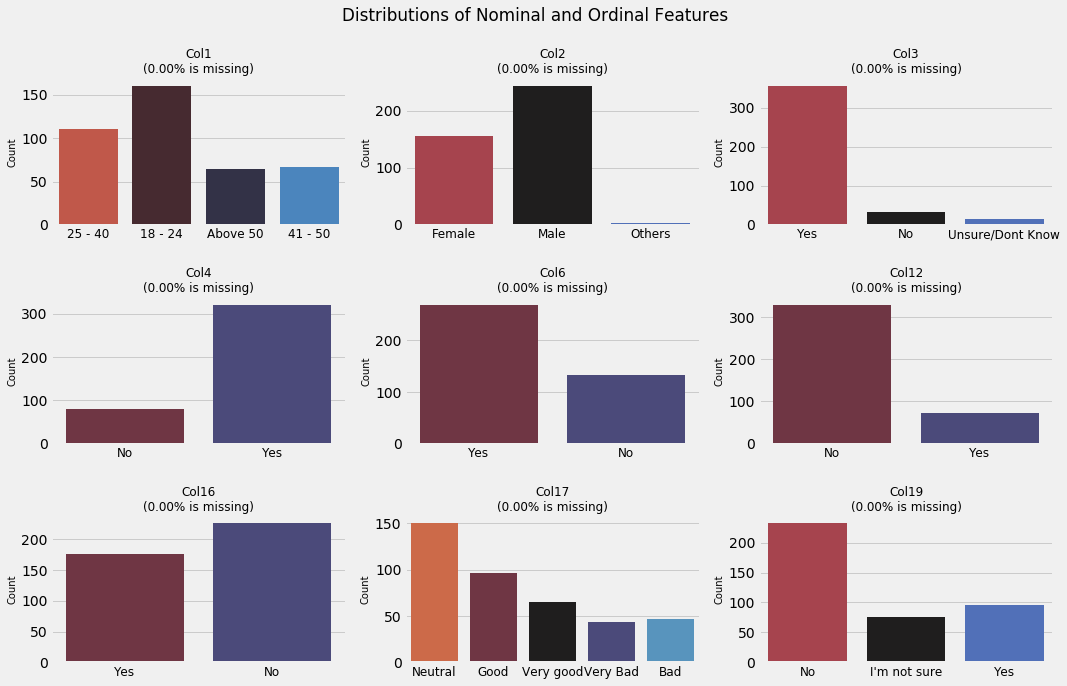

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Nominal and Ordinal Features')

n_rows, n_cols = (3,3)

for index, column in enumerate(nominal):
    
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(DataFrame[column].dropna().shape[0])/DataFrame.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=DataFrame,label=collabel, 
                        palette="icefire_r", ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=12)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=10)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=12)

plt.show()

In [13]:
DataFrame["Ratings"]=DataFrame["Col17"]

for i in range(DataFrame.shape[0]):
    if DataFrame.iloc[i,25]=='Very good':
        DataFrame.iloc[i,25]= 5
    if DataFrame.iloc[i,25]=='Good':
        DataFrame.iloc[i,25]= 3
    if DataFrame.iloc[i,25]=='Neutral':
        DataFrame.iloc[i,25]= 3
    if DataFrame.iloc[i,25]=='Bad':
        DataFrame.iloc[i,25]= 2
    if DataFrame.iloc[i,25]=='Very Bad':
        DataFrame.iloc[i,25]= 1
        

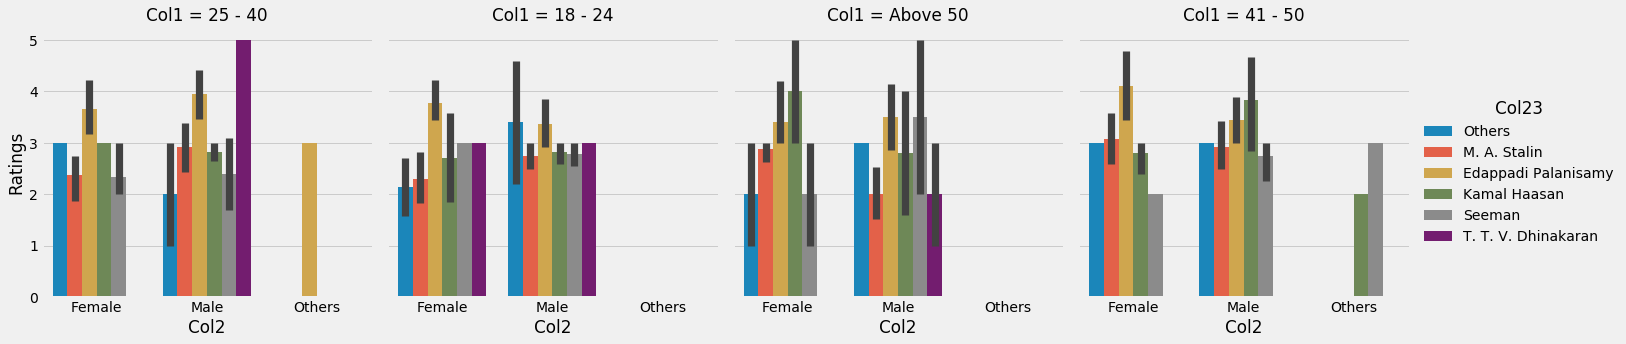

In [14]:
g=sns.catplot(x="Col2", y="Ratings",
                hue="Col23", col="Col1",
                data=DataFrame, kind="bar");

[Text(0.5, 1.0, '')]

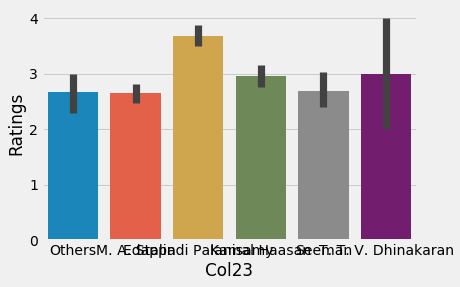

In [15]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Col23", y="Ratings", data=DataFrame, ax=ax).set(title='')

---
## 4. Data Cleaning 

#### <u>Case 1</u>
    
    # Col3 : Are you a registered to vote? 
    No/Unsure
    # Col7 : Did you voted in the  2021 elections? 
    /Yes
    

In [16]:
A = DataFrame.query('Col3 == ["No"] & Col7 == ["Yes"]')
A

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
197,198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"I'm Eligible to vote, but not having Voter ID",Online Ads,...,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion,2
246,247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,...,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician,1
267,268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,...,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises,5
270,271,25 - 40,Female,No,Yes,A moderate amount,Yes,Yes,NaN,Online Ads,...,Yes,Good,Somewhat dissatisfied,Yes,Vote for the same party,MNM,No idea,Kamal Haasan,does good for people,3


#### <u>Case 2</u>

    # Col1 : Which of the following best describes your age?    
    /Above 25
    # Col3 : Are you a registered to vote?    
    /No/Unsure


In [17]:
B = DataFrame.query('Col1 != ["18 - 24","25 - 40"] & Col3 == ["No"]')
B

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
196,197,Above 50,Female,No,No,None at all,No,No,"I'm Eligible to vote, but not having Voter ID",Other,...,Yes,Neutral,I'm not sure,No,Vote for the same party,NTK,ntk is best,Edappadi Palanisamy,majority,3
202,203,41 - 50,Male,No,No,A lot,No,No,I do not have reliable transportation to votin...,Articles in the newspaper,...,No,Neutral,Somewhat satisfied,No,May change,DMK / CONGRESS,NaN,M. A. Stalin,NaN,3
213,214,Above 50,Male,No,No,None at all,No,No,Due to COVID safety measure,I research all the channels before making my c...,...,No,Bad,I'm not sure,I'm not sure,Not prefer to say,AIADMK / BJP,Need more experience about the process,Edappadi Palanisamy,Publicity,2
220,221,41 - 50,Female,No,No,None at all,No,No,Due to COVID safety measure,Other,...,No,Good,Somewhat satisfied,Yes,Not prefer to say,DMK / CONGRESS,NaN,Kamal Haasan,NaN,3
223,224,Above 50,Female,No,No,A lot,Yes,No,I do not have reliable transportation to votin...,News on TV,...,No,Neutral,Somewhat dissatisfied,No,May change,MNM,NaN,M. A. Stalin,NaN,3
232,233,Above 50,Male,No,No,A lot,Yes,No,Due to COVID safety measure,Other,...,No,Very Bad,Fully dissatisfied,No,May change,NOTA,NaN,T. T. V. Dhinakaran,NaN,1
248,249,41 - 50,Male,No,No,A moderate amount,No,No,"I'm Eligible to vote, but not having Voter ID",News on TV,...,Yes,Neutral,Somewhat dissatisfied,No,Not prefer to say,Others,NaN,Others,NaN,3
267,268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,...,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises,5
288,289,41 - 50,Male,No,No,None at all,No,No,I am not registered,Other,...,No,Neutral,Somewhat dissatisfied,No,Not prefer to say,NOTA,NaN,Others,NaN,3


In [18]:
DataFrame["Col8"]=DataFrame["Col8"].replace("I'm Eligible to vote, but not having Voter ID", "Eligible to vote, but not having Voter ID")

#### <u>Case 3</u>
    
    # Col6 : In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors  
    /Yes
    # Col8 : If not voted, why ?    
    /I'm Eligible to vote, but not having Voter ID
    

In [19]:
C = DataFrame.query('Col6 == ["Yes"] & Col8 == ["Eligible to vote, but not having Voter ID"]')
C

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
8,9,18 - 24,Male,Yes,Yes,A little,Yes,Yes,"Eligible to vote, but not having Voter ID",I research all the channels before making my c...,...,Yes,Neutral,I'm not sure,Yes,Not prefer to say,MNM,Nil,Kamal Haasan,Kamal Haasan,3
182,183,25 - 40,Female,Yes,No,A moderate amount,Yes,No,"Eligible to vote, but not having Voter ID",Online Ads,...,Yes,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,Rude,Edappadi Palanisamy,Good leader,2
197,198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"Eligible to vote, but not having Voter ID",Online Ads,...,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion,2
228,229,18 - 24,Female,Yes,Yes,A little,Yes,No,"Eligible to vote, but not having Voter ID",Articles in the newspaper,...,No,Neutral,Somewhat satisfied,I'm not sure,May change,NTK,NaN,T. T. V. Dhinakaran,NaN,3
290,291,18 - 24,Female,Yes,Yes,A lot,Yes,Yes,"Eligible to vote, but not having Voter ID",Attended events where the candidate is address...,...,Yes,Neutral,Somewhat satisfied,Yes,May change,DMK / CONGRESS,NaN,Seeman,NaN,3


#### <u>Case 4</u>
    
    # Col16 : Do you think the existing government is going in the right direction to benefit Tamil Nadu's people?
    /Yes
    # Col17 : How would you rate Edappadi Palanisamy’s performance as the Chief Minister of Tamil Nadu  
    /Very Bad (Biased)


In [20]:
D = DataFrame.query('Col16 == ["Yes"] & Col17 == ["Very Bad","Bad"]')
D

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
23,24,18 - 24,Female,Yes,Yes,A lot,No,Yes,NaN,I research all the channels before making my c...,...,Yes,Very Bad,Fully dissatisfied,No,May change,DMK / CONGRESS,Promises are strong.,M. A. Stalin,Governance of ruling party are bad so there wi...,1
171,172,41 - 50,Female,Yes,No,A moderate amount,No,Yes,NaN,Attended events where the candidate is address...,...,Yes,Bad,Somewhat satisfied,I'm not sure,May change,DMK / CONGRESS,Good person,M. A. Stalin,Talented,2
173,174,18 - 24,Female,No,No,None at all,No,No,"Eligible to vote, but not having Voter ID",Other,...,Yes,Very Bad,Somewhat dissatisfied,I'm not sure,Not prefer to say,DMK / CONGRESS,Talented,M. A. Stalin,Talented,1
174,175,25 - 40,Female,Yes,No,A little,Yes,No,I do not like any of the candidates running,Online Ads,...,Yes,Bad,Somewhat satisfied,No,May change,NTK,No opinion,Edappadi Palanisamy,Majority,2
182,183,25 - 40,Female,Yes,No,A moderate amount,Yes,No,"Eligible to vote, but not having Voter ID",Online Ads,...,Yes,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,Rude,Edappadi Palanisamy,Good leader,2
246,247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,...,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician,1


#### <u>Case 5</u>
    
    # Col11 : On what basis you select your political candidate. 
    /A die-hard fan of the Party/Candidate
    # Col10 : Which of the following best describes your decision to vote in the 2021 election? 
    /I am going to vote, and I don't care who wins.
    

In [21]:
DataFrame["Col10"]=DataFrame["Col10"].replace("I am going to vote, and I don't care who wins.", "I am going to vote, and I dont care who wins.")

In [22]:
E = DataFrame.query('Col11 == ["A die-hard fan of the Party/Candidate"] & Col10 == ["I am going to vote, and I dont care who wins."]')
E

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
141,142,Above 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,No,Bad,Somewhat dissatisfied,No,Vote for the same party,DMK / CONGRESS,Congress,M. A. Stalin,They'll get more votes this time,2
144,145,Above 50,Male,Yes,Yes,A lot,Yes,Yes,NaN,I research all the channels before making my c...,...,Yes,Neutral,I'm not sure,Yes,Vote for the same party,DMK / CONGRESS,Good,M. A. Stalin,Talented person,3
221,222,Above 50,Female,Yes,No,A lot,Yes,Yes,NaN,Other,...,No,Good,Somewhat dissatisfied,Yes,May change,NTK,-,Seeman,May win due to power of money,3


In [23]:
Cleanup_Data = [A, B, C, D, E]
Cleanup_Result = pd.concat(Cleanup_Data)
Cleanup_Result

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
197,198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"I'm Eligible to vote, but not having Voter ID",Online Ads,...,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion,2
246,247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,...,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician,1
267,268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,...,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises,5
270,271,25 - 40,Female,No,Yes,A moderate amount,Yes,Yes,NaN,Online Ads,...,Yes,Good,Somewhat dissatisfied,Yes,Vote for the same party,MNM,No idea,Kamal Haasan,does good for people,3
196,197,Above 50,Female,No,No,None at all,No,No,"I'm Eligible to vote, but not having Voter ID",Other,...,Yes,Neutral,I'm not sure,No,Vote for the same party,NTK,ntk is best,Edappadi Palanisamy,majority,3
202,203,41 - 50,Male,No,No,A lot,No,No,I do not have reliable transportation to votin...,Articles in the newspaper,...,No,Neutral,Somewhat satisfied,No,May change,DMK / CONGRESS,NaN,M. A. Stalin,NaN,3
213,214,Above 50,Male,No,No,None at all,No,No,Due to COVID safety measure,I research all the channels before making my c...,...,No,Bad,I'm not sure,I'm not sure,Not prefer to say,AIADMK / BJP,Need more experience about the process,Edappadi Palanisamy,Publicity,2
220,221,41 - 50,Female,No,No,None at all,No,No,Due to COVID safety measure,Other,...,No,Good,Somewhat satisfied,Yes,Not prefer to say,DMK / CONGRESS,NaN,Kamal Haasan,NaN,3
223,224,Above 50,Female,No,No,A lot,Yes,No,I do not have reliable transportation to votin...,News on TV,...,No,Neutral,Somewhat dissatisfied,No,May change,MNM,NaN,M. A. Stalin,NaN,3
232,233,Above 50,Male,No,No,A lot,Yes,No,Due to COVID safety measure,Other,...,No,Very Bad,Fully dissatisfied,No,May change,NOTA,NaN,T. T. V. Dhinakaran,NaN,1


In [24]:
Cleanup_Result = pd.DataFrame.drop_duplicates(Cleanup_Result)
Cleanup_Result.set_index("Sno")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
Sno,,,,,,,,,,,,,,,,,,,,,
198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"I'm Eligible to vote, but not having Voter ID",Online Ads,"I am going to vote, but I am not sure who I wi...",...,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion,2
247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,"I am going to vote, but I am not sure who I wi...",...,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician,1
268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,"I am going to vote, and I know which candidate...",...,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises,5
271,25 - 40,Female,No,Yes,A moderate amount,Yes,Yes,NaN,Online Ads,"I am going to vote, but I am not sure who I wi...",...,Yes,Good,Somewhat dissatisfied,Yes,Vote for the same party,MNM,No idea,Kamal Haasan,does good for people,3
197,Above 50,Female,No,No,None at all,No,No,"I'm Eligible to vote, but not having Voter ID",Other,"I am going to vote, but I am not sure who I wi...",...,Yes,Neutral,I'm not sure,No,Vote for the same party,NTK,ntk is best,Edappadi Palanisamy,majority,3
203,41 - 50,Male,No,No,A lot,No,No,I do not have reliable transportation to votin...,Articles in the newspaper,Other,...,No,Neutral,Somewhat satisfied,No,May change,DMK / CONGRESS,NaN,M. A. Stalin,NaN,3
214,Above 50,Male,No,No,None at all,No,No,Due to COVID safety measure,I research all the channels before making my c...,Other,...,No,Bad,I'm not sure,I'm not sure,Not prefer to say,AIADMK / BJP,Need more experience about the process,Edappadi Palanisamy,Publicity,2
221,41 - 50,Female,No,No,None at all,No,No,Due to COVID safety measure,Other,Other,...,No,Good,Somewhat satisfied,Yes,Not prefer to say,DMK / CONGRESS,NaN,Kamal Haasan,NaN,3
224,Above 50,Female,No,No,A lot,Yes,No,I do not have reliable transportation to votin...,News on TV,"I am going to vote, and I don't care who wins.",...,No,Neutral,Somewhat dissatisfied,No,May change,MNM,NaN,M. A. Stalin,NaN,3


In [25]:
F = list(Cleanup_Result["Sno"])

In [26]:
F

[198,
 247,
 268,
 271,
 197,
 203,
 214,
 221,
 224,
 233,
 249,
 289,
 9,
 183,
 198,
 229,
 291,
 24,
 172,
 174,
 175,
 142,
 145,
 222]

In [27]:
Refined_Dataset = DataFrame.query('Sno != [198, 247, 268, 271, 197, 203, 214, 221, 224, 233, 249, 289, 9, 183, 198, 229, 291, 24, 172, 174, 175, 142, 145, 222]')
Refined_Dataset

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Ratings
0,1,25 - 40,Female,Yes,No,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,Yes,Neutral,I'm not sure,No,Vote for the same party,NOTA,NaN,Others,NaN,3
1,2,18 - 24,Male,Yes,Yes,A lot,Yes,Yes,NaN,News on TV,...,No,Neutral,Fully dissatisfied,No,Vote for the same party,MNM,NaN,M. A. Stalin,NaN,3
2,3,18 - 24,Male,Yes,No,A lot,Yes,Yes,NaN,News on TV,...,Yes,Good,Somewhat satisfied,I'm not sure,Vote for the same party,AIADMK / BJP,Honest sincere and hardworking,Edappadi Palanisamy,Because of his leadership experience and ideol...,3
3,4,25 - 40,Male,Yes,Yes,A lot,No,Yes,NaN,I research all the channels before making my c...,...,Yes,Very good,Fully satisfied,Yes,Vote for the same party,AIADMK / BJP,Satisfactory,Edappadi Palanisamy,He is the best,5
4,5,18 - 24,Female,No,No,A moderate amount,No,No,"Eligible to vote, but not having Voter ID",I research all the channels before making my c...,...,No,Very Bad,Somewhat dissatisfied,No,Vote for the same party,MNM,New-promising candidate ..,Kamal Haasan,Has concern for the people,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,25 - 40,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,News on TV,...,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN,5
398,399,41 - 50,Male,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,Yes,Good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN,3
399,400,41 - 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN,5
400,401,Above 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,No,Neutral,I'm not sure,No,Vote for the same party,DMK / CONGRESS,NaN,M. A. Stalin,NaN,3


In [28]:
DataFrame.shape

(402, 26)

In [29]:
Cleanup_Result.shape

(24, 26)

In [30]:
Refined_Dataset.shape

(379, 26)

In [31]:
Refined_Dataset.to_csv('Refined_Worksheet.csv', header=True, index=False) 

---
## 5. Data Pre-processing

In [32]:
Refined_Dataset['Col1'] =Refined_Dataset['Col1'].replace(to_replace={'18 - 24':0,'25 - 40':1,'41 - 50':2,'Above 50':3})
Refined_Dataset['Col2'] =Refined_Dataset['Col2'].replace(to_replace={'Female':0,'Male':1,'Others':2})
Refined_Dataset['Col3'] =Refined_Dataset['Col3'].replace(to_replace={'No':0,'Yes':1,'Unsure/Dont Know':2})
Refined_Dataset['Col4'] =Refined_Dataset['Col4'].replace(to_replace={'No':0,'Yes':1})
Refined_Dataset['Col5'] =Refined_Dataset['Col5'].replace(to_replace={'None at all':0,
                                                                     'A little':1,
                                                                     'A moderate amount':2,
                                                                     'A lot':3})
Refined_Dataset['Col6'] =Refined_Dataset['Col6'].replace(to_replace={'No':0,'Yes':1})
Refined_Dataset['Col7'] =Refined_Dataset['Col7'].replace(to_replace={'No':0,'Yes':1})
Refined_Dataset['Col8'] =Refined_Dataset['Col8'].replace(to_replace={np.nan:0,
                                                                     'Eligible to vote, but not having Voter ID':1,
                                                                     'I do not have reliable transportation to voting poll':2,
                                                                     'I am not registered':3,
                                                                     'I do not like any of the candidates running':4,
                                                                     'Due to COVID safety measure':5})

Refined_Dataset['Col9'] =Refined_Dataset['Col9'].replace(to_replace={'Articles in the newspaper':0,
                                                                     'News on TV':1,
                                                                     'I research all the channels before making my choice':2,
                                                                     'Attended events where the candidate is addressing the people':3,
                                                                     'Online Ads':4,
                                                                     'Other':5})

Refined_Dataset['Col10'] =Refined_Dataset['Col10'].replace(to_replace={'I am going to vote, and I know which candidate I am voting for.':0,
                                                                     'I am going to vote, and I dont care who wins.':1,
                                                                     'I research all the channels before making my choice':2,
                                                                     'I am going to vote, but I am not sure who I will vote for yet.':3,
                                                                     'Other':4})

Refined_Dataset['Col11'] =Refined_Dataset['Col11'].replace(to_replace={'A die-hard fan of the Party/Candidate':0,
                                                                     'On the basis on their promises':1,
                                                                     'On the basis of past experience/Leadership':2,
                                                                     'Influenced by others (Family, Peers)':3})

Refined_Dataset['Col12'] =Refined_Dataset['Col12'].replace(to_replace={'No':0,'Yes':1})
Refined_Dataset['Col13'] =Refined_Dataset['Col13'].replace(to_replace={'No':0,'Yes':1})
Refined_Dataset['Col14'] =Refined_Dataset['Col14'].replace(to_replace={'No':0,'Yes':1})
Refined_Dataset['Col15'] =Refined_Dataset['Col15'].replace(to_replace={'No':0,'Yes':1})
Refined_Dataset['Col16'] =Refined_Dataset['Col16'].replace(to_replace={'No':0,'Yes':1})

Refined_Dataset['Col17'] =Refined_Dataset['Col17'].replace(to_replace={'Very Bad':1,
                                                                       'Bad':2,
                                                                       'Neutral':3,
                                                                       'Good':4,
                                                                       'Very good':5})

Refined_Dataset['Col18'] =Refined_Dataset['Col18'].replace(to_replace={"Fully dissatisfied":1,
                                                                       'Somewhat dissatisfied':2,
                                                                       "I'm not sure":3,
                                                                       'Somewhat satisfied':4,
                                                                       'Fully satisfied':5})

Refined_Dataset['Col19'] =Refined_Dataset['Col19'].replace(to_replace={'No':0,
                                                                       "I'm not sure":2,
                                                                       'Yes':1})

Refined_Dataset['Col20'] =Refined_Dataset['Col20'].replace(to_replace={'Not prefer to say':0,
                                                                       "Vote for the same party":1,
                                                                       'May change':2})

Refined_Dataset['Col21'] =Refined_Dataset['Col21'].replace(to_replace={"NOTA":5,
                                                                       'MNM':3,
                                                                       "AIADMK / BJP":1,
                                                                       'DMK / CONGRESS':2,
                                                                       'NTK':4,
                                                                       'Others':0})

Refined_Dataset['Col23'] =Refined_Dataset['Col23'].replace(to_replace={"Edappadi Palanisamy":1,
                                                                       'M. A. Stalin':2,
                                                                       "Kamal Haasan":3,
                                                                       'Seeman':4,
                                                                       'T. T. V. Dhinakaran':5,
                                                                       'Others':0})

In [33]:
Df=Refined_Dataset.drop(['Col22','Col24','Ratings'],axis=1)
Df=Df.set_index("Sno")
Df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col23
Sno,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,2,1,1,0,0,0,...,0,0,0,1,3,3,0,1,5,0
2,0,1,1,1,3,1,1,0,1,0,...,0,0,0,0,3,1,0,1,3,2
3,0,1,1,0,3,1,1,0,1,0,...,0,0,0,1,4,4,2,1,1,1
4,1,1,1,1,3,0,1,0,2,0,...,0,0,0,1,5,5,1,1,1,1
5,0,0,0,0,2,0,0,1,2,0,...,0,0,1,0,1,2,0,1,3,3


---
## 6. Feature Selection

In [34]:
X = Df.drop(['Col23'],axis=1)
y = Df['Col23']

# importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),k_features=10,forward=True,floating=False,scoring = 'r2',cv = 0)
sfs.fit(X, y)
selected_features = sfs.k_feature_names_ # to get the final set of features
Selected_Features=[]
for i in selected_features:
    Selected_Features.append(i)
    
Selected_Features

['Col2',
 'Col3',
 'Col5',
 'Col11',
 'Col12',
 'Col15',
 'Col18',
 'Col19',
 'Col20',
 'Col21']

In [35]:
X = Df[Selected_Features]
y = Df['Col23']
X.astype(int)
y.astype(int)

Sno
1      0
2      2
3      1
4      1
5      3
      ..
398    1
399    1
400    1
401    2
402    2
Name: Col23, Length: 379, dtype: int32

---
## 7. Model Building

In [36]:
import time
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 7.1 Without Hyper Parameter Tuning

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [38]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

**GAUSSIAN NAIVE BAYES**

In [39]:
start_nb1 = time.time()
gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
nb_model = gnb1.fit(X_train, y_train)
end_nb1 = time.time()
final_nb1 = end_nb1 - start_nb1
final_nb1 = round(final_nb1,3)
final_nb1

y_pred_nb1 = gnb1.predict(X_test)

#display_confusion_matrix(y_test, y_pred_nb)
accuracy_nb1=accuracy_score(y_test, y_pred_nb1)
print("Gaussian Naive Bayes model accuracy :", accuracy_nb1)
print("Computation time {} - Sec".format(final_nb1))

Gaussian Naive Bayes model accuracy : 0.3026315789473684
Computation time 0.006 - Sec


**LOGISTIC REGRESSION**

In [40]:
start_lr1 = time.time()
lr1 = LogisticRegression() 
lr1.fit(X_train, y_train) 
end_lr1 = time.time()
final_lr1 = end_lr1 - start_lr1
final_lr1 = round(final_lr1,3)

y_pred_lr1 = lr1.predict(X_test)
accuracy_lr1=accuracy_score(y_test, y_pred_lr1)
print("Accuracy of Logistic Regression is :", accuracy_lr1)
print("Computation time {} - Sec".format(final_lr1))

Accuracy of Logistic Regression is : 0.5526315789473685
Computation time 0.027 - Sec


**DECISION TREE**

In [41]:
start_dt1 = time.time()
clf1 = DecisionTreeClassifier()

dt_model1 = clf1.fit(X_train, y_train)
end_dt1 = time.time()
final_dt1 = end_dt1 - start_dt1
final_dt1 = round(final_dt1,3)

y_pred_dt1 = dt_model1.predict(X_test)
accuracy_dt1=accuracy_score(y_test, y_pred_dt1)
print("Accuracy of Decision Tree is :", accuracy_dt1)
print("Computation time {} - Sec".format(final_dt1))

Accuracy of Decision Tree is : 0.5657894736842105
Computation time 0.002 - Sec


**RANDOM FOREST**

In [42]:
start_rf1 = time.time()

rf1=RandomForestClassifier()
rf_model1 = rf1.fit(X_train, y_train)
end_rf1 = time.time()
final_rf1 = end_rf1 - start_rf1
final_rf1 = round(final_rf1,3)

y_pred_rf1 = rf_model1.predict(X_test)
accuracy_rf1=accuracy_score(y_test, y_pred_rf1)
print("Accuracy of Random Forests model is :", accuracy_rf1)
print("Computation time {} - Sec".format(final_rf1))

Accuracy of Random Forests model is : 0.6447368421052632
Computation time 0.234 - Sec


**XGB CLASSIFIER**

In [43]:
start_xg1 = time.time()
xg1 = XGBClassifier()
xg_model1 = xg1.fit(X_train, y_train)
end_xg1 = time.time()
final_xg1 = end_xg1 - start_xg1
final_xg1 = round(final_xg1,3)

y_pred_xg1 = xg_model1.predict(X_test)
accuracy_xg1=accuracy_score(y_test, y_pred_xg1)
print("Accuracy of Random Forests model is :", accuracy_xg1)
print("Computation time {} - Sec".format(final_xg1))

Accuracy of Random Forests model is : 0.6710526315789473
Computation time 0.402 - Sec


**SUPPORT VECTOR CLASSIFIER**

In [44]:
start_svm1 = time.time()
svm1 = SVC()

svm1.fit(X_train, y_train)

end_svm1 = time.time()
final_svm1 = end_svm1 - start_svm1
final_svm1 = round(final_svm1,3)

y_pred_svm1 = svm1.predict(X_test)
accuracy_svm1=accuracy_score(y_test, y_pred_svm1)
print("Accuracy of Support Vector Machine is :", accuracy_svm1)
print("Computation time {} - Sec".format(final_svm1))

Accuracy of Support Vector Machine is : 0.5921052631578947
Computation time 0.014 - Sec


**ARTIFICIAL NEURAL NETWORK** 

In [45]:
start_mlp1 = time.time()
mlp1 = MLPClassifier()
mlp1.fit(X_train, y_train.values.ravel())

end_mlp1 = time.time()
final_mlp1 = end_mlp1 - start_mlp1
final_mlp1 = round(final_mlp1,3)

y_pred_mlp1= mlp1.predict(X_test)
accuracy_mlp1=accuracy_score(y_test, y_pred_mlp1)
print("Accuracy of Artificial neural network  is :", accuracy_mlp1)
print("Computation time {} - Sec".format(final_mlp1))

Accuracy of Artificial neural network  is : 0.5657894736842105
Computation time 0.766 - Sec


**K NEAREST NEIGHBORS CLASSIFIER**

In [46]:
start_knn1 = time.time()
model11 = KNeighborsClassifier(n_jobs=-1)
model11.fit(X_train, y_train)
end_knn1 = time.time()
final_knn1 = end_knn1 - start_knn1
final_knn1 = round(final_knn1,3)

y_pred_knn1 = model11.predict(X_test)
accuracy_knn1=accuracy_score(y_test, y_pred_knn1)
print("\nAccuracy of k Nearest Neighbors is :", accuracy_knn1)
print("Computation time {} - Sec".format(final_knn1))


Accuracy of k Nearest Neighbors is : 0.5
Computation time 0.002 - Sec


### 7.2 With Hyper Parameter Tuning

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [48]:
def display_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred_lr)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

In [49]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

**GAUSSIAN NAIVE BAYES**

In [50]:
start_nb = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
nb_model = gnb.fit(X_train, y_train)
end_nb = time.time()
final_nb = end_nb - start_nb
final_nb = round(final_nb,3)
final_nb
y_pred_nb = gnb.predict(X_test)

accuracy_nb=accuracy_score(y_test, y_pred_nb)
print("Gaussian Naive Bayes model accuracy :", accuracy_nb)
print("Computation time {} - Sec".format(final_nb))

Gaussian Naive Bayes model accuracy : 0.3026315789473684
Computation time 0.007 - Sec


**LOGISTIC REGRESSION**

In [51]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
start_lr = time.time()
lr = GridSearchCV(LogisticRegression(),param_grid,cv = 5)
lr.fit(X_train, y_train)
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_))
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {} \n\n".format(lr.best_estimator_))

y_pred_lr = lr.predict(X_test)

accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("\nAccuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.5478688524590163
Best estimator is LogisticRegression(C=31.622776601683793) 



Accuracy of Logistic Regression is : 0.5657894736842105
Computation time 2.97 - Sec


**DECISION TREE**

In [52]:
hyperparam_combs = {
'max_depth': [4, 6, 8, 10, 12],
'criterion': ['gini', 'entropy'],
'min_samples_split': [2, 10, 20, 30, 40],
'max_features': [0.2, 0.4, 0.6, 0.8, 1],
'max_leaf_nodes': [8, 16, 32, 64, 128],
'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

start_dt = time.time()
clf = RandomizedSearchCV(DecisionTreeClassifier(),hyperparam_combs,scoring='f1',random_state=1,n_iter=20)
dt_model = clf.fit(X_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_))
print("Best score is {}".format(dt_model.best_score_))
print("Best estimator is {}".format(dt_model.best_estimator_))
y_pred_dt = dt_model.predict(X_test)

accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree is :", accuracy_dt)
print("Computation time {} - Sec".format(final_dt))

Tuned Decision Tree Parameters: {'min_samples_split': 20, 'max_leaf_nodes': 16, 'max_features': 0.4, 'max_depth': 6, 'criterion': 'gini', 'class_weight': {0: 1, 1: 5}}
Best score is nan
Best estimator is DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=6, max_features=0.4,
                       max_leaf_nodes=16, min_samples_split=20)
Accuracy of Decision Tree is : 0.5
Computation time 0.446 - Sec


**RANDOM FOREST**

In [53]:
param_grid = {"n_estimators": np.arange(2, 100, 2),
"max_depth": np.arange(1, 20, 1),
"min_samples_split": np.arange(1,150,1),
"min_samples_leaf": np.arange(1,60,1),
"max_leaf_nodes": np.arange(2,60,1),
"min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

start_rf = time.time()
rf = RandomizedSearchCV(RandomForestClassifier(),param_grid,scoring='f1',random_state=4658,n_iter=20)
rf_model = rf.fit(X_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)

# Print the tuned parameters and score
print("Tuned Random Tree Parameters: {}".format(rf_model.best_params_))
print("Best score is {}".format(rf_model.best_score_))
print("Best estimator is {}".format(rf_model.best_estimator_))
y_pred_rf = rf_model.predict(X_test)

accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forests model is :", accuracy_rf)
print("Computation time {} - Sec".format(final_rf))

Tuned Random Tree Parameters: {'n_estimators': 12, 'min_weight_fraction_leaf': 0.30000000000000004, 'min_samples_split': 44, 'min_samples_leaf': 17, 'max_leaf_nodes': 57, 'max_depth': 3}
Best score is nan
Best estimator is RandomForestClassifier(max_depth=3, max_leaf_nodes=57, min_samples_leaf=17,
                       min_samples_split=44,
                       min_weight_fraction_leaf=0.30000000000000004,
                       n_estimators=12)
Accuracy of Random Forests model is : 0.5131578947368421
Computation time 9.824 - Sec


**XGB CLASSIFIER**

In [54]:
params={"learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
       "max_depth": [3,4,5,6,8,10,12,15],
       "min_child_weight": [1,3,5,7],
       "gamma": [0.0,0.1,0.2,0.3,0.4],
       "colsample_bytree":[0.3,0.4,0.5,0.7]
       }
start_xg = time.time()
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
xg_model = random_search.fit(X_train, y_train)
end_xg = time.time()
final_xg = end_xg - start_xg
final_xg = round(final_xg,3)

# Print the tuned parameters and score
print("Tuned XGB Classifier Parameters: {}".format(xg_model.best_params_))
print("Best score is {}".format(xg_model.best_score_))
print("Best estimator is {}".format(xg_model.best_estimator_))
y_pred_xg = xg_model.predict(X_test)

accuracy_xg=accuracy_score(y_test, y_pred_xg)
print("Accuracy of Random Forests model is :", accuracy_xg)
print("Computation time {} - Sec".format(final_xg))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned XGB Classifier Parameters: {'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.4}
Best score is 0.722896174863388
Best estimator is XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=15,
              min_child_weight=7, objective='multi:softprob')
Accuracy of Random Forests model is : 0.618421052631579
Computation time 10.013 - Sec


**SUPPORT VECTOR CLASSIFIER**

In [55]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}

start_svm = time.time()
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
svm.fit(X_train, y_train)
end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)

# Print the tuned parameters and score
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_))
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))
y_pred_svm = svm.predict(X_test)

accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

**ARTIFICIAL NEURAL NETWORK** 

In [56]:
param_grid = {
'max_iter': [1000]
}
start_mlp = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
mlp.fit(X_train, y_train.values.ravel())
end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)

# Print the tuned parameters and score
print("Tuned Artificial neural network Parameters: {}".format(mlp.best_params_))
print("Best score is {}".format(mlp.best_score_))
print("Best estimator is {}".format(mlp.best_estimator_))

y_pred_mlp = mlp.predict(X_test)
accuracy_mlp=accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Artificial neural network is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................max_iter=1000; total time=   2.9s
[CV 2/5] END ..................................max_iter=1000; total time=   3.0s
[CV 3/5] END ..................................max_iter=1000; total time=   2.9s
[CV 4/5] END ..................................max_iter=1000; total time=   3.2s
[CV 5/5] END ..................................max_iter=1000; total time=   3.7s
Tuned Artificial neural network Parameters: {'max_iter': 1000}
Best score is 0.5911475409836067
Best estimator is MLPClassifier(max_iter=1000)
Accuracy of Artificial neural network is : 0.5657894736842105
Computation time 20.824 - Sec


**K NEAREST NEIGHBORS CLASSIFIER**

In [57]:
model = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors':[5,6,7,8,9,10],
'leaf_size':[1,2,3,5],
'weights':['uniform', 'distance'],
'algorithm':['auto', 'ball_tree','kd_tree','brute'],
'n_jobs':[-1]}
start_knn = time.time()
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(X_train, y_train)
end_knn = time.time()
final_knn = end_knn - start_knn
final_knn = round(final_knn,3)
final_knn
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(model1.best_params_))
print("Best score is {}".format(model1.best_score_))
print("Best estimator is {} \n\n".format(model1.best_estimator_))
y_pred_knn = model1.predict(X_test)

accuracy_knn=accuracy_score(y_test, y_pred_knn)
print("\nAccuracy of k Nearest Neighbors is \t:", accuracy_knn)
print("Best Accuracy of k Nearest Neighbors is : {}".format(model1.best_score_))
print("Computation time {} - Sec".format(final_knn))

Tuned Logistic Regression Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}
Best score is 0.6008196721311475
Best estimator is KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=9, weights='distance') 



Accuracy of k Nearest Neighbors is 	: 0.5263157894736842
Best Accuracy of k Nearest Neighbors is : 0.6008196721311475
Computation time 47.102 - Sec


### 7.3 With PCA Implementation

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [59]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [60]:
# Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.1740318 , 0.13347281])

**GAUSSIAN NAIVE BAYES**

In [61]:
start_nb = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
nb_model = gnb.fit(X_train, y_train)
end_nb = time.time()
final_nb = end_nb - start_nb
final_nb = round(final_nb,3)
final_nb

y_pred_nb = gnb.predict(X_test)

#display_confusion_matrix(y_test, y_pred_nb)
accuracy_nb=accuracy_score(y_test, y_pred_nb)
print("Gaussian Naive Bayes model accuracy :", accuracy_nb)
print("Computation time {} - Sec".format(final_nb))

Gaussian Naive Bayes model accuracy : 0.4473684210526316
Computation time 0.012 - Sec


**LOGISTIC REGRESSION**

In [62]:
start_lr = time.time()
lr = LogisticRegression() 
lr.fit(X_train, y_train) 
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)

y_pred_lr = lr.predict(X_test)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

Accuracy of Logistic Regression is : 0.4605263157894737
Computation time 0.027 - Sec


**DECISION TREE**

In [63]:
start_dt = time.time()
clf = DecisionTreeClassifier()

dt_model = clf.fit(X_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)

y_pred_dt = dt_model.predict(X_test)
accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree is :", accuracy_dt)
print("Computation time {} - Sec".format(final_dt))

Accuracy of Decision Tree is : 0.40789473684210525
Computation time 0.005 - Sec


**RANDOM FOREST**

In [64]:
start_rf = time.time()

rf=RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forests model is :", accuracy_rf)
print("Computation time {} - Sec".format(final_rf))

Accuracy of Random Forests model is : 0.4342105263157895
Computation time 0.337 - Sec


**XGB CLASSIFIER**

In [65]:
start_xg = time.time()

xg = XGBClassifier()

xg_model = xg.fit(X_train, y_train)
end_xg = time.time()
final_xg = end_xg - start_xg
final_xg = round(final_xg,3)

y_pred_xg = xg_model.predict(X_test)
accuracy_xg=accuracy_score(y_test, y_pred_xg)
print("Accuracy of Random Forests model is :", accuracy_xg)
print("Computation time {} - Sec".format(final_xg))

Accuracy of Random Forests model is : 0.34210526315789475
Computation time 0.467 - Sec


**SUPPORT VECTOR CLASSIFIER**

In [66]:
start_svm = time.time()
svm = SVC()

svm.fit(X_train, y_train)

end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)

y_pred_svm = svm.predict(X_test)
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

Accuracy of Support Vector Machine is : 0.42105263157894735
Computation time 0.01 - Sec


**ARTIFICIAL NEURAL NETWORK** 

In [67]:
start_mlp = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train.values.ravel())

end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)

y_pred_mlp = mlp.predict(X_test)
accuracy_mlp=accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Artificial neural network  is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

Accuracy of Artificial neural network  is : 0.40789473684210525
Computation time 0.78 - Sec


**K NEAREST NEIGHBORS CLASSIFIER**

In [68]:
start_knn = time.time()
model1 = KNeighborsClassifier(n_jobs=-1)
model1.fit(X_train, y_train)
end_knn = time.time()
final_knn = end_knn - start_knn
final_knn = round(final_knn,3)

y_pred_knn = model1.predict(X_test)
accuracy_knn=accuracy_score(y_test, y_pred_knn)
print("\nAccuracy of k Nearest Neighbors is :", accuracy_knn)
print("Computation time {} - Sec".format(final_knn))


Accuracy of k Nearest Neighbors is : 0.35526315789473684
Computation time 0.002 - Sec


---
## Comparison

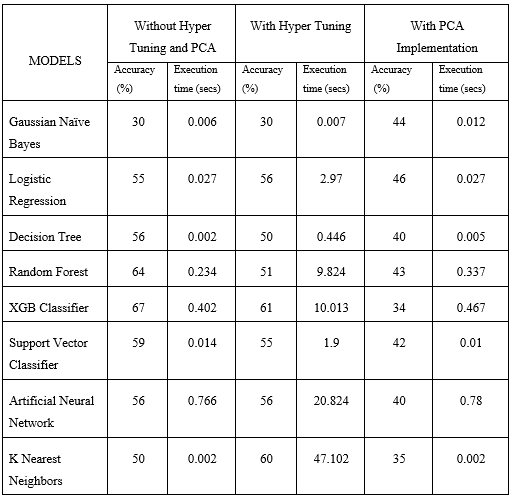

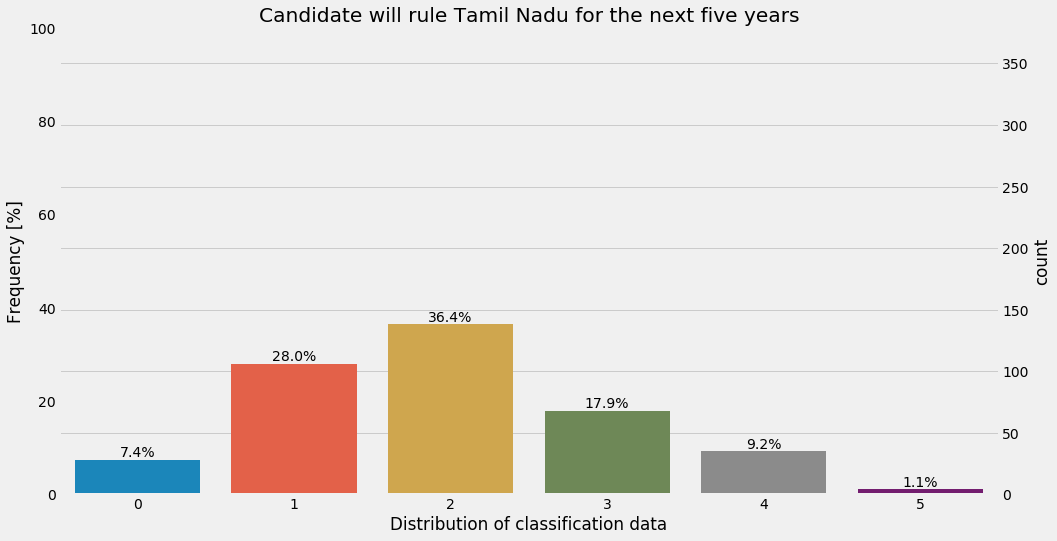

In [69]:
# Some random data
ncount = 379

plt.figure(figsize=(15,8))
ax = sns.countplot(x="Col23", data=Refined_Dataset)
plt.title('Candidate will rule Tamil Nadu for the next five years')
plt.xlabel('Distribution of classification data')

ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

ax2.grid(None)